# Read in the SWE data from the netCDF file

All of these files can be accessed at https://rda.ucar.edu/datasets/ds612.0/

In this example, one file is converted to 3-hr sums.

In [ ]:
import xarray as xr

# snow_ds = xr.open_dataset("../example_data/wrf2d_d01_CTRL_SNOW_ACC_NC_201301-201303.nc")

# load in two prec acc datasets
rain_ds_1 = xr.open_dataset("../example_data/rain_data/wrf2d_d01_CTRL_PREC_ACC_NC_200101-200103.nc")
rain_ds_2 = xr.open_dataset("../example_data/rain_data/wrf2d_d01_CTRL_PREC_ACC_NC_200104-200106.nc")

# Resample each rain dataset to 3-hour sums
rain_ds_1_3h = rain_ds_1.resample(Time='3H').sum('Time')
rain_ds_2_3h = rain_ds_2.resample(Time='3H').sum('Time')

# combine the two rain datasets. Make this a loop over a bunch of them in the future. THIS USES UP ALL THE MEMORY ON MAC NEED TO RUN THIS ON A CLUSTER.
rain_ds_3h = xr.concat([rain_ds_1_3h, rain_ds_2_3h], dim="Time")

# Save the combined 3h dataset to a NetCDF file
rain_ds_3h.to_netcdf("3H_sum_PREC_ACC_CTRL_2001.nc")

# snow_ds.SNOW_ACC_NC
rain_ds_3h.PREC_ACC_NC

/Users/jinjiang-macair/anaconda3/envs/future_snow/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
/Users/jinjiang-macair/anaconda3/envs/future_snow/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


## Examine the Time dimension

We see the data are from every hour.

In [2]:
rain_ds.Time

<xarray.DataArray 'Time' (Time: 2160)> Size: 17kB
array(['2001-01-01T00:00:00.000000000', '2001-01-01T01:00:00.000000000',
       '2001-01-01T02:00:00.000000000', ..., '2001-03-31T21:00:00.000000000',
       '2001-03-31T22:00:00.000000000', '2001-03-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 17kB 2001-01-01 ... 2001-03-31T23:00:00
Attributes:
    long_name:    Time
    description:  Time

# Plot the data on a simple map

Text(0.5, 1.0, 'PREC ACC Accumulation (mm) valid 2001-01-28 12:00:00')

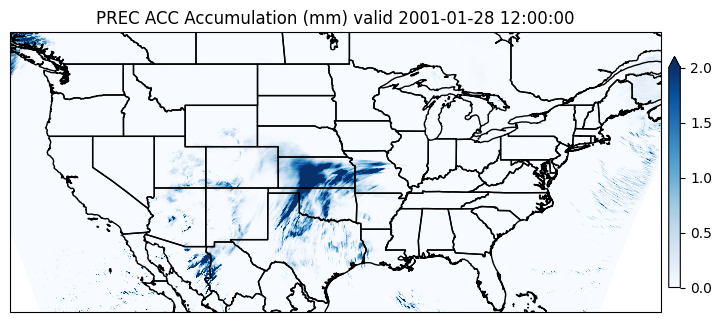

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

example = rain_ds.sel(Time='2001-01-28 12:00:00')

mmp = ax.pcolormesh(example.XLONG, example.XLAT, example.PREC_ACC_NC, vmax=2, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

plt.title("PREC ACC Accumulation (mm) valid 2001-01-28 12:00:00")

# To improve continuity in the tracking, we can combine multiple hours into 3-hr chunks

An example using three hours on 2013-01-28 from 12:00 UTC to 14:00 UTC

Text(0.5, 1.0, 'PREC ACC Accumulation (mm) valid 2001-01-28 12 - 14 UTC')

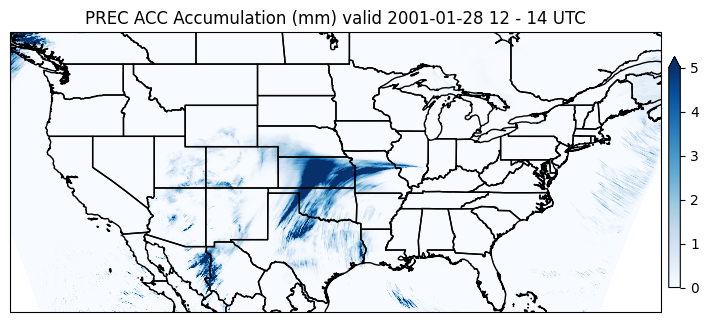

In [ ]:
example1 = rain_ds.sel(Time='2001-01-28 12:00:00')
example2 = rain_ds.sel(Time='2001-01-28 13:00:00')
example3 = rain_ds.sel(Time='2001-01-28 14:00:00')

total = example1.PREC_ACC_NC + example2.PREC_ACC_NC + example3.PREC_ACC_NC

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

example = rain_ds.sel(Time='2001-01-28 12:00:00')

mmp = ax.pcolormesh(example.XLONG, example.XLAT, total.data, vmax=5, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

plt.title("PREC ACC Accumulation (mm) valid 2001-01-28 12 - 14 UTC")

# Or, more simply..

Text(0.5, 1.0, 'PREC ACC Accumulation (mm) valid 2001-01-28 12 - 14 UTC')

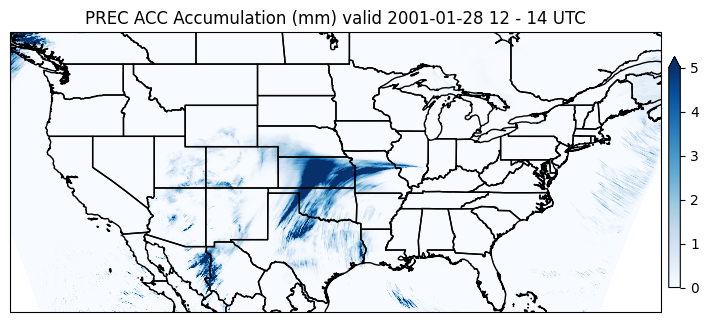

In [ ]:
example_slice = rain_ds.sel(Time=slice('2001-01-28 12:00:00', '2001-01-28 14:00:00'))

example_sum = example_slice.resample(Time='3h').sum('Time')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

mmp = ax.pcolormesh(example_slice.XLONG.values, example_slice.XLAT.values, example_sum.PREC_ACC_NC.values[0], vmax=5, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

plt.title("PREC ACC Accumulation (mm) valid 2001-01-28 12 - 14 UTC")

# Sanity check...

Check the total difference between the 3H resample and the manual 3H summation

In [8]:
import numpy as np

np.sum(total - example_sum.PREC_ACC_NC.values[0])

<xarray.DataArray 'PREC_ACC_NC' ()> Size: 4B
array(0., dtype=float32)
Coordinates:
    Time     datetime64[ns] 8B 2001-01-28T14:00:00

# Read in the 3H transformed dataset and compare

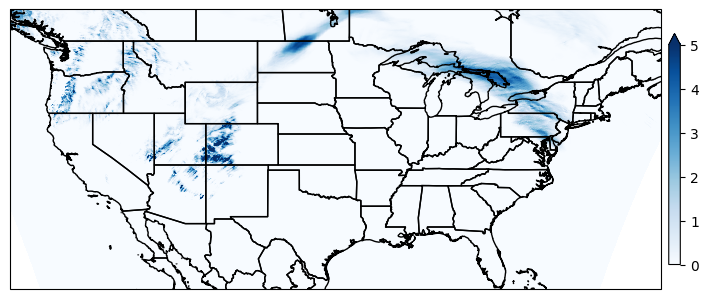

In [7]:
ds_3h = xr.open_dataset("../example_data/3H_sum_SNOW_ACC_CTRL_2012-2013.nc")

ds_3h_ex = ds_3h.sel(Time="2013-01-28 12:00:00")

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

mmp = ax.pcolormesh(ds_3h_ex.XLONG.values, ds_3h_ex.XLAT.values, ds_3h_ex.SNOW_ACC_NC.values, vmax=5, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

# Find the difference between these data and the manual examples above

In [8]:
np.sum(ds_3h_ex.SNOW_ACC_NC.values - example_sum.SNOW_ACC_NC.values[0])

np.float32(0.0)

# The transformed data ("3H_sum_SNOW_ACC_*.nc") are used for the paper

save the 3h transformed data to a .nc file